In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import math
import missingno as miss
import seaborn
import scipy.stats as sp
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
import heapq
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats

In [2]:
data = pd.read_csv('data3.csv')
display(data)

C:\Users\chenm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,GSM505327,GSM505337,GSM505339,GSM505341,GSM505345,GSM505346,GSM505347,GSM505349,GSM505350,...,GSM505591,GSM505592,GSM505593,GSM505594,GSM505597,GSM505598,GSM505599,GSM505600,GSM505602,GSM505603
0,response,RD,RD,pCR,pCR,RD,RD,RD,pCR,RD,...,RD,RD,RD,RD,RD,pCR,RD,RD,RD,RD
1,MIR4640///DDR1,12.444,12.4537,11.8757,12.5807,11.9077,11.8592,12.0612,12.3641,12.0602,...,11.6306,12.1274,12.5949,11.0304,12.4202,11.9979,11.9181,11.9971,11.4574,11.9181
2,RFC2,8.3774,7.5118,8.0035,8.0104,7.6548,8.7641,8.3111,8.9391,8.6066,...,8.7054,8.7217,7.8179,7.6113,7.8715,7.7001,6.8594,7.1246,8.0488,7.389
3,HSPA6,6.7866,8.2514,8.1103,7.5885,9.1468,6.7698,8.0799,7.882,7.6073,...,7.5483,8.3809,7.5622,8.4018,7.5772,6.4521,8.429,8.224,8.2875,8.2965
4,PAX8,10.2851,10.8806,10.6567,10.1383,11.5483,10.6987,10.6865,10.1676,10.6249,...,10.5137,10.6423,10.369,11.3001,11.3879,10.9807,11.5083,10.7761,11.0754,10.8386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13295,FAM86DP///FAM86B2///FAM86FP///FAM86B1///FAM86C1,8.5051,8.5766,8.5403,7.9241,7.2227,7.7947,8.219,8.0514,7.048,...,8.5664,8.9262,8.761,7.7666,8.2993,8.8653,8.3577,7.4649,8.3421,7.7428
13296,SNHG17,8.417,8.8085,9.9117,8.9754,9.1001,9.4642,8.159,8.6066,7.9843,...,9.6782,8.7501,8.4215,9.0027,8.8195,8.0856,9.0823,8.8814,9.2724,8.5136
13297,HNRNPUL2BSCL2///HNRNPUL2,6.7108,7.7507,6.2477,6.2028,7.3382,7.4923,7.1253,7.0082,6.9644,...,6.8133,6.958,6.8581,6.9429,7.2944,6.5897,4.4206,7.7323,7.7647,6.7397
13298,LOC100505915,5.7872,7.9462,4.1954,5.4359,7.5612,5.6228,5.198,4.7518,5.6967,...,6.632,5.5351,7.0834,6.3202,6.4521,6.5988,6.0652,5.4339,7.9446,6.7938


In [3]:
y = data.iloc[0,1:]
y_encode = np.where(y == "pCR", 0, 1)
gene = data.iloc[1:,1:]
gene_names=data.iloc[1:,0]

In [4]:
round(np.random.uniform(0,13299))

2700

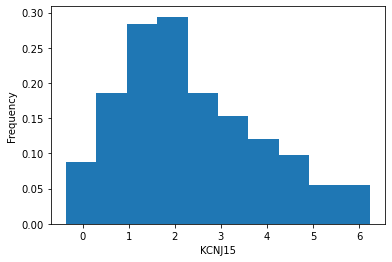

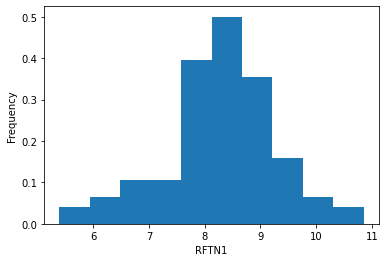

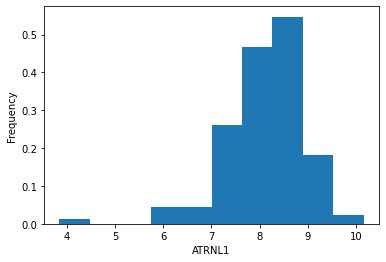

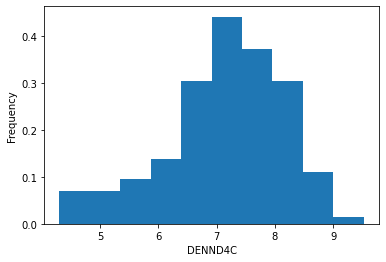

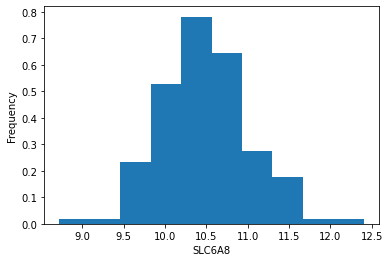

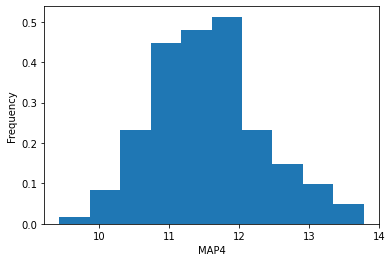

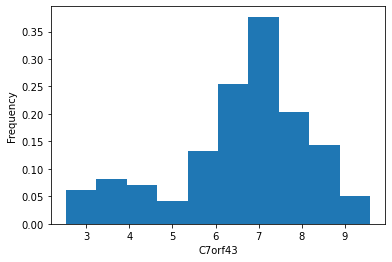

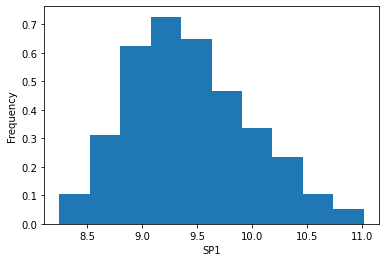

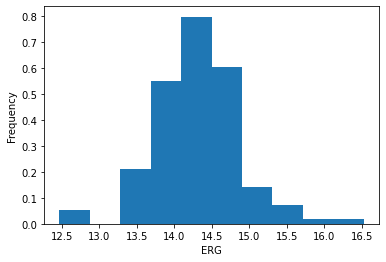

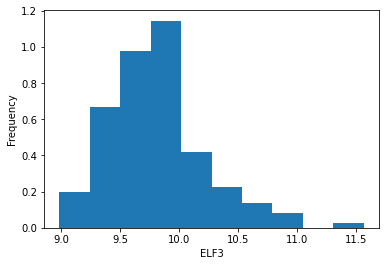

In [5]:
for i in range(10):
    plt.figure()
    k=round(np.random.uniform(0,13299))
    plt.hist(np.array(gene.iloc[k,:],dtype=float),density=True)
    plt.xlabel(gene_names[k])
    plt.ylabel('Frequency')
    plt.show()

Text(0.5, 1.0, 'Figure 1: Ratio of response')

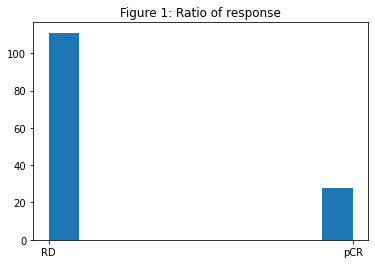

In [6]:
plt.hist(y)
plt.title('Figure 1: Ratio of response')

In [7]:
corr=[]
for i in range(13299):
    corr.append(abs(pearsonr(np.float64(y_encode),np.float64(gene.iloc[i,:]))[0]))

In [8]:
import copy 
t = copy.deepcopy(corr)
max_number = []
max_index_corr = []
for _ in range(20):
    number = max(t)
    index = t.index(number)
    t[index] = 0
    max_number.append(number)
    max_index_corr.append(index)
t = []

In [9]:
print(np.array(max_index_corr))
print(gene_names[max_index_corr])

[ 4046  3369 13108  3498 10733  3902 10386 10836   713  3058   245  2967
  3502  1794  2100   436  1658 10295  7951  1407]
4046        SPIB
3369      CYP2J2
13108      TJAP1
3498       SURF2
10733      RNF25
3902         SDS
10386       ENY2
10836     COL5A3
713        PFDN1
3058      ATP2B2
245       IQGAP1
2967       ABCG1
3502       RBMS2
1794       TTC37
2100        STX7
436        SNU13
1658       CNPY2
10295    CARHSP1
7951       SETD2
1407     TNFAIP2
Name: Unnamed: 0, dtype: object


In [10]:
genes_maxcorr = gene.iloc[max_index_corr]

In [11]:
#100 largest corr genes
genes_maxcorr = genes_maxcorr.transpose()

In [12]:
corr_genes = np.float32(genes_maxcorr)

In [13]:
np.corrcoef(corr_genes).shape

(139, 139)

<AxesSubplot:>

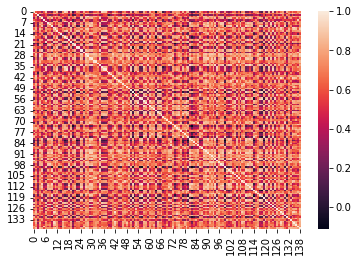

In [14]:
seaborn.heatmap(np.corrcoef(corr_genes))

In [15]:
def entropy(df):
    array = np.array(df.value_counts()/df.size)
    return sum([array[i]*np.log2(1/array[i]) for i in range(array.size)])
def con_entropy(df_X,df_Y):
    cate = np.unique(df_Y)
    con_entro = []
    for i in cate:
        df = df_X[df_Y==i]
        con_entro.append(entropy(df))
    P_Y = np.array(pd.DataFrame(df_Y).value_counts()/df_Y.size)
    return sum(con_entro*P_Y)

In [16]:
# mutual information
data_pheno = y_encode
data_trans = gene
I_list = []
for i in range(data_trans.shape[0]):
    H_trans = entropy(data_trans.iloc[i,:])
    H_trans_pheno = con_entropy(data_trans.iloc[i,:],data_pheno)
    I_list.append(H_trans-H_trans_pheno)

In [17]:
t = copy.deepcopy(I_list)
max_number_I = []
max_index_I = []
for _ in range(20):
    number = max(t)
    index = t.index(number)
    t[index] = 0
    max_number_I.append(number)
    max_index_I.append(index)
t = []

In [18]:
genes_maxI = gene.iloc[max_index_I]
genes_maxI = genes_maxI.transpose()

In [19]:
print(gene_names[max_index_I])

12414       FRMD1
18           PLD1
39            FAU
42          RPL18
383         HIF1A
386          IPO7
570          SDC1
762          TMX4
769         ANXA2
1098          MX1
1159        VEZF1
1285        TRIM2
1389       AFG3L2
1586        CASP3
1813        MYO1E
1891         TFAM
1926         CLK2
2087         EML3
2102        VPS16
2204     DYNC1LI2
Name: Unnamed: 0, dtype: object


In [20]:
# wilcoxson rank-sum test
X_data = np.array(data.iloc[1:,1:],dtype=float).reshape(-1,13299)
gene_names=data.iloc[1:,0]

In [21]:
X_data_0 = X_data[np.where(y_encode==0)[0],:]
X_data_1 = X_data[np.where(y_encode==1)[0],:]

In [22]:
P_list=[]
for i in range(X_data.shape[1]):
    P = scipy.stats.ranksums(X_data_0[:,i],X_data_1[:,i])[1]
    P_list.append(P)

In [23]:
import heapq
min_index_wil = np.argsort(P_list)[0:20]
min_index_wil = list(min_index_wil)

In [24]:
genes_wil = gene.iloc[min_index_wil]
genes_wil = genes_wil.transpose()

In [25]:
print(gene_names[min_index_wil])

9777                     TRIM44
5060     LOC101928635///ALDH1A2
8188                       MISP
9778                       ADI1
8203                      NCAPH
556                      NUDCD3
564         LOC101926921///DAB2
8190                     TSPYL4
8260                      NTAN1
12028                     PAQR5
8180                     THAP11
11823                     MCUR1
8175                     LRRC47
8227      MZT2A///MZT2B///PHGDH
9788                     NDUFA4
8194                      MCF2L
2312                       BAK1
9746                      EIF3L
9767                      COPG1
568                        APEH
Name: Unnamed: 0, dtype: object


In [26]:
# From now, we have three sets of genes based on correlations, mutual information and wilcoxson rank-sum
# Next, we build models based on these three data sets

Text(0.5, 1.0, 'Figure 3: first two genes in set B')

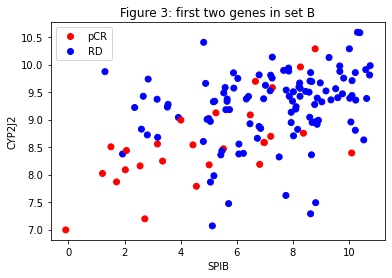

In [27]:
from matplotlib.colors import ListedColormap
# scatter plot for max 2 corrlations
x = np.array(genes_maxcorr.iloc[:,0],dtype=float)
y = np.array(genes_maxcorr.iloc[:,1],dtype=float)
classes = ['pCR', 'RD']
values = y_encode
colors = ListedColormap(['r','b'])
scatter = plt.scatter(x, y, c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel(gene_names[max_index_corr[0]])
plt.ylabel(gene_names[max_index_corr[1]])
plt.title('Figure 3: first two genes in set B')

Text(0.5, 1.0, 'Figure 2: first two genes in set A')

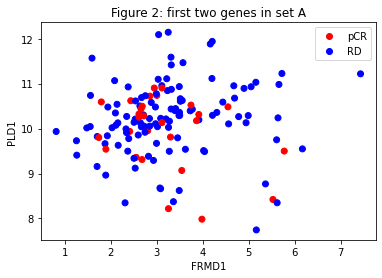

In [28]:
# scatter plot for max 2 mutual information
x = np.array(genes_maxI.iloc[:,0],dtype=float)
y = np.array(genes_maxI.iloc[:,1],dtype=float)
classes = ['pCR', 'RD']
values = y_encode
colors = ListedColormap(['r','b'])
scatter = plt.scatter(x, y, c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel(gene_names[max_index_I[0]])
plt.ylabel(gene_names[max_index_I[1]])
plt.title('Figure 2: first two genes in set A')

Text(0.5, 1.0, 'Figure 4: first two genes in set C')

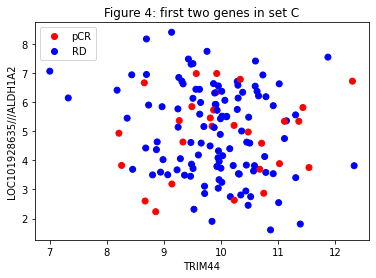

In [29]:
# scatter plot for min 2 p-values for wilcoxson
x = np.array(genes_wil.iloc[:,0],dtype=float)
y = np.array(genes_wil.iloc[:,1],dtype=float)
classes = ['pCR', 'RD']
values = y_encode
colors = ListedColormap(['r','b'])
scatter = plt.scatter(x, y, c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel(gene_names[min_index_wil[0]])
plt.ylabel(gene_names[min_index_wil[1]])
plt.title('Figure 4: first two genes in set C')

In [30]:
#Logistics rg
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold

In [31]:
# Train test split
X_train_corr, X_test_corr, y_train_corr, y_test_corr =  train_test_split(genes_maxcorr,y_encode,test_size=0.3,stratify=y_encode,random_state=423)
X_train_I, X_test_I, y_train_I, y_test_I =  train_test_split(genes_maxI,y_encode,test_size=0.3,stratify=y_encode,random_state=423)
X_train_wil, X_test_wil, y_train_wil, y_test_wil =  train_test_split(genes_wil,y_encode,test_size=0.3,stratify=y_encode,random_state=423)


In [32]:
# train
lg_corr = LogisticRegression(random_state=666, max_iter = 1000).fit(X_train_corr,y_train_corr)
lg_I =  LogisticRegression(random_state=666, max_iter = 1000).fit(X_train_I,y_train_I)
lg_wil =  LogisticRegression(random_state=666, max_iter = 1000).fit(X_train_wil,y_train_wil)

In [33]:
# predict
y_pred_corr = lg_corr.predict(X_test_corr)
y_pred_I = lg_I.predict(X_test_I)
y_pred_wil = lg_wil.predict(X_test_wil)

y_proba_corr = lg_corr.predict_proba(X_test_corr)
y_proba_I = lg_I.predict_proba(X_test_I)
y_proba_wil = lg_wil.predict_proba(X_test_wil)

Accuracy score for logistics model with max correlations: 0.9047619047619048
Accuracy score for logistics model with max mutual informations: 0.6904761904761905
Accuracy score for logistics model with min Wilcoxson rank-sum test P-values: 0.8095238095238095


Text(0.5, 1.0, 'Logistics Regression')

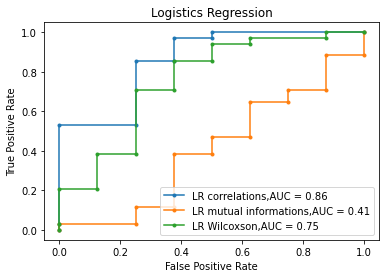

In [34]:
# performance
print(f'Accuracy score for logistics model with max correlations: {accuracy_score(y_test_corr,y_pred_corr)}')
print(f'Accuracy score for logistics model with max mutual informations: {accuracy_score(y_test_I,y_pred_I)}')
print(f'Accuracy score for logistics model with min Wilcoxson rank-sum test P-values: {accuracy_score(y_test_wil,y_pred_wil)}')

proba_list = [y_proba_corr,y_proba_I,y_proba_wil]
test_list = [y_test_corr,y_test_I,y_test_wil]
name_list = ['LR correlations','LR mutual informations','LR Wilcoxson']
i=0
for proba in proba_list:
    fpr, tpr, _ = roc_curve(test_list[i], proba[:,1])
    auc = roc_auc_score(test_list[i], proba[:,1])
    plt.plot(fpr, tpr, marker='.', label= '%s,AUC = %0.2f' % (name_list[i],auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    i=i+1
plt.title('Logistics Regression')

In [35]:
#SVM
from sklearn.svm import SVC
svm_corr = SVC(class_weight='balanced', probability= True ).fit(X_train_corr,y_train_corr)
svm_I =  SVC(class_weight='balanced', probability= True ).fit(X_train_I,y_train_I)
svm_wil =  SVC(class_weight='balanced', probability= True ).fit(X_train_wil,y_train_wil)


In [36]:
# predict
y_pred_corr_svm = svm_corr.predict(X_test_corr)
y_pred_I_svm = svm_I.predict(X_test_I)
y_pred_wil_svm = svm_wil.predict(X_test_wil)

y_proba_corr_svm = svm_corr.predict_proba(X_test_corr)
y_proba_I_svm = svm_I.predict_proba(X_test_I)
y_proba_wil_svm = svm_wil.predict_proba(X_test_wil)

Accuracy score for SVM with max correlations: 0.7857142857142857
Accuracy score for SVM with max mutual informations: 0.5952380952380952
Accuracy score for SVM with min Wilcoxson rank-sum test P-values: 0.7380952380952381


Text(0.5, 1.0, 'SVM')

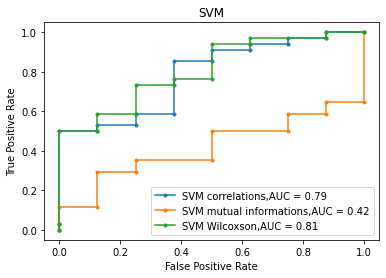

In [37]:
# performance
print(f'Accuracy score for SVM with max correlations: {accuracy_score(y_test_corr,y_pred_corr_svm)}')
print(f'Accuracy score for SVM with max mutual informations: {accuracy_score(y_test_I,y_pred_I_svm)}')
print(f'Accuracy score for SVM with min Wilcoxson rank-sum test P-values: {accuracy_score(y_test_wil,y_pred_wil_svm)}')

proba_list = [y_proba_corr_svm,y_proba_I_svm,y_proba_wil_svm]
test_list = [y_test_corr,y_test_I,y_test_wil]
name_list = ['SVM correlations','SVM mutual informations','SVM Wilcoxson']
i=0
for proba in proba_list:
    fpr, tpr, _ = roc_curve(test_list[i], proba[:,1])
    auc = roc_auc_score(test_list[i], proba[:,1])
    plt.plot(fpr, tpr, marker='.', label= '%s,AUC = %0.2f' % (name_list[i],auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    i=i+1
plt.title('SVM')

In [38]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_corr = LDA().fit(X_train_corr,y_train_corr)
lda_I =  LDA().fit(X_train_I,y_train_I)
lda_wil =  LDA().fit(X_train_wil,y_train_wil)


In [39]:
#predict
y_pred_corr_lda = lda_corr.predict(X_test_corr)
y_pred_I_lda = lda_I.predict(X_test_I)
y_pred_wil_lda = lda_wil.predict(X_test_wil)

y_proba_corr_lda = lda_corr.predict_proba(X_test_corr)
y_proba_I_lda = lda_I.predict_proba(X_test_I)
y_proba_wil_lda = lda_wil.predict_proba(X_test_wil)

Accuracy score for LDA with max correlations: 0.8809523809523809
Accuracy score for LDA with max mutual informations: 0.6904761904761905
Accuracy score for LDA with min Wilcoxson rank-sum test P-values: 0.7857142857142857


Text(0.5, 1.0, 'LDA')

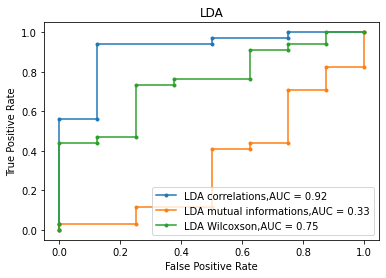

In [40]:
# performance
print(f'Accuracy score for LDA with max correlations: {accuracy_score(y_test_corr,y_pred_corr_lda)}')
print(f'Accuracy score for LDA with max mutual informations: {accuracy_score(y_test_I,y_pred_I_lda)}')
print(f'Accuracy score for LDA with min Wilcoxson rank-sum test P-values: {accuracy_score(y_test_wil,y_pred_wil_lda)}')

proba_list = [y_proba_corr_lda,y_proba_I_lda,y_proba_wil_lda]
test_list = [y_test_corr,y_test_I,y_test_wil]
name_list = ['LDA correlations','LDA mutual informations','LDA Wilcoxson']
i=0
for proba in proba_list:
    fpr, tpr, _ = roc_curve(test_list[i], proba[:,1])
    auc = roc_auc_score(test_list[i], proba[:,1])
    plt.plot(fpr, tpr, marker='.', label= '%s,AUC = %0.2f' % (name_list[i],auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    i=i+1
plt.title('LDA')

In [41]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda_corr = QDA().fit(X_train_corr,y_train_corr)
qda_I =  QDA().fit(X_train_I,y_train_I)
qda_wil =  QDA().fit(X_train_wil,y_train_wil)

C:\Users\chenm\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\chenm\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\chenm\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [42]:
#predict
y_pred_corr_qda = qda_corr.predict(X_test_corr)
y_pred_I_qda = qda_I.predict(X_test_I)
y_pred_wil_qda = qda_wil.predict(X_test_wil)

y_proba_corr_qda = qda_corr.predict_proba(X_test_corr)
y_proba_I_qda = qda_I.predict_proba(X_test_I)
y_proba_wil_qda = qda_wil.predict_proba(X_test_wil)

Accuracy score for QDA with max correlations: 0.8095238095238095
Accuracy score for QDA with max mutual informations: 0.8095238095238095
Accuracy score for QDA with min Wilcoxson rank-sum test P-values: 0.8095238095238095


Text(0.5, 1.0, 'QDA')

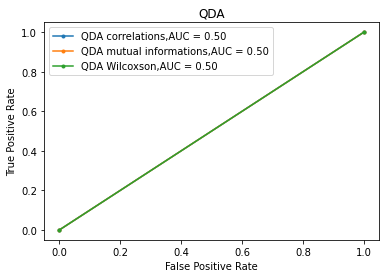

In [43]:
# performance
print(f'Accuracy score for QDA with max correlations: {accuracy_score(y_test_corr,y_pred_corr_qda)}')
print(f'Accuracy score for QDA with max mutual informations: {accuracy_score(y_test_I,y_pred_I_qda)}')
print(f'Accuracy score for QDA with min Wilcoxson rank-sum test P-values: {accuracy_score(y_test_wil,y_pred_wil_qda)}')

proba_list = [y_proba_corr_qda,y_proba_I_qda,y_proba_wil_qda]
test_list = [y_test_corr,y_test_I,y_test_wil]
name_list = ['QDA correlations','QDA mutual informations','QDA Wilcoxson']
i=0
for proba in proba_list:
    fpr, tpr, _ = roc_curve(test_list[i], proba[:,1])
    auc = roc_auc_score(test_list[i], proba[:,1])
    plt.plot(fpr, tpr, marker='.', label= '%s,AUC = %0.2f' % (name_list[i],auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    i=i+1
plt.title('QDA')

In [44]:
#random forest
from sklearn.ensemble import RandomForestClassifier as rf
rf_corr = rf(random_state=423,class_weight='balanced').fit(X_train_corr,y_train_corr)
rf_I =  rf(random_state=423,class_weight='balanced').fit(X_train_I,y_train_I)
rf_wil =  rf(random_state=423,class_weight='balanced').fit(X_train_wil,y_train_wil)

In [45]:
#predict
y_pred_corr_rf = rf_corr.predict(X_test_corr)
y_pred_I_rf = rf_I.predict(X_test_I)
y_pred_wil_rf = rf_wil.predict(X_test_wil)

y_proba_corr_rf = rf_corr.predict_proba(X_test_corr)
y_proba_I_rf = rf_I.predict_proba(X_test_I)
y_proba_wil_rf = rf_wil.predict_proba(X_test_wil)

Accuracy score for RF with max correlations: 0.8809523809523809
Accuracy score for RF with max mutual informations: 0.7857142857142857
Accuracy score for RF with min Wilcoxson rank-sum test P-values: 0.8095238095238095


Text(0.5, 1.0, 'Random Forest')

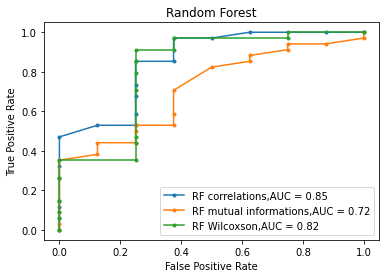

In [46]:
# performance
print(f'Accuracy score for RF with max correlations: {accuracy_score(y_test_corr,y_pred_corr_rf)}')
print(f'Accuracy score for RF with max mutual informations: {accuracy_score(y_test_I,y_pred_I_rf)}')
print(f'Accuracy score for RF with min Wilcoxson rank-sum test P-values: {accuracy_score(y_test_wil,y_pred_wil_rf)}')

proba_list = [y_proba_corr_rf,y_proba_I_rf,y_proba_wil_rf]
test_list = [y_test_corr,y_test_I,y_test_wil]
name_list = ['RF correlations','RF mutual informations','RF Wilcoxson']
i=0
for proba in proba_list:
    fpr, tpr, _ = roc_curve(test_list[i], proba[:,1])
    auc = roc_auc_score(test_list[i], proba[:,1])
    plt.plot(fpr, tpr, marker='.', label= '%s,AUC = %0.2f' % (name_list[i],auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    i=i+1
plt.title('Random Forest')

In [47]:
# implement neural network
from keras.layers import Dense
from keras.models import Sequential

KeyboardInterrupt: 

In [ ]:
# define the neural network model
def define_model(n_input):
    # define model
    model = Sequential()
    # define first 2 hidden layers and visible layer
    model.add(Dense(8, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    #model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # define loss and optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


In [ ]:
# get models
n_input = 20
w = {0:20,1:77}
model_corr = define_model(n_input)
model_I = define_model(n_input)
model_wil = define_model(n_input)

In [ ]:
history_corr = model_corr.fit(np.array(X_train_corr,dtype=float), y_train_corr, class_weight=w, epochs=10, verbose=0)
history_I = model_I.fit(np.array(X_train_I,dtype=float), y_train_I, class_weight=w, epochs=10, verbose=0)
history_wil = model_wil.fit(np.array(X_train_wil,dtype=float), y_train_wil, class_weight=w, epochs=10, verbose=0)


In [ ]:
#predict
y_pred_corr_nn = model_corr.predict(np.array(X_test_corr,dtype=float))
y_pred_I_nn = model_I.predict(np.array(X_test_I,dtype=float))
y_pred_wil_nn = model_wil.predict(np.array(X_test_wil,dtype=float))

# y_proba_corr_rf = rf_corr.predict_proba(X_test_corr)
# y_proba_I_rf = rf_I.predict_proba(X_test_I)
# y_proba_wil_rf = rf_wil.predict_proba(X_test_wil)

In [ ]:
# performance
# print(f'Accuracy score for ANN with max correlations: {accuracy_score(y_test_corr,y_pred_corr_nn)}')
# print(f'Accuracy score for ANN with max mutual informations: {accuracy_score(y_test_I,y_pred_I_nn)}')
# print(f'Accuracy score for ANN with min Wilcoxson rank-sum test P-values: {accuracy_score(y_test_wil,y_pred_wil_nn)}')

proba_list = [y_pred_corr_nn,y_pred_I_nn,y_pred_wil_nn]
test_list = [y_test_corr,y_test_I,y_test_wil]
name_list = ['ANN correlations','ANN mutual informations','ANN Wilcoxson']
i=0
for proba in proba_list:
    fpr, tpr, _ = roc_curve(test_list[i], proba)
    auc = roc_auc_score(test_list[i], proba)
    plt.plot(fpr, tpr, marker='.', label= '%s,AUC = %0.2f' % (name_list[i],auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    i=i+1
plt.title('ANN')

In [ ]:
[i for i in min_index_wil if i in max_index_I]

In [ ]:
rf_corr.feature_importances_

In [ ]:
rf_wil.feature_importances_

In [ ]:
rf_I.feature_importances_

In [ ]:
impot_list = [rf_corr.feature_importances_,rf_I.feature_importances_,rf_wil.feature_importances_]
name_list = [gene_names[max_index_corr],gene_names[max_index_I],gene_names[min_index_wil]]

In [ ]:
inde_list[2]

In [ ]:
inde_list=[]
for i in range(3):
    inde = list(np.argsort(-impot_list[i])[0:3])
    inde_list.append(inde)
    name = pd.DataFrame(name_list[i])
    print(name.iloc[inde])

In [ ]:
from mpl_toolkits import mplot3d
# Define Data

x = np.arange(0, 20, 0.2)
y =  np.sin(x)
z1 = np.cos(x)
z2 = np.exp(8)
 
# Create Figure

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Create Plot

ax.scatter3D(x, y, z1, marker='<', s=20, label='Triangle')
ax.scatter3D(x, y, z2, marker='o', s=20, label='Circle' )

# Add legend

ax.legend(loc=1)
 
# Show plot

plt.show()

In [ ]:
x = genes_maxcorr.iloc[:,inde_list[0]]
x1 = np.array(x.iloc[:,0],dtype=float)
x2 = np.array(x.iloc[:,1],dtype=float)
x3 = np.array(x.iloc[:,2],dtype=float)
y_0 = np.where(y_encode==0)
y_1 = np.where(y_encode==1)
xx1 = x1[y_0]
xx2 = x2[y_0]
xx3 = x3[y_0]
yy1 = x1[y_1]
yy2 = x2[y_1]
yy3 = x3[y_1]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(xx1, xx2, xx3, marker='<', s=20, label='pCR')
ax.scatter3D(yy1, yy2, yy3, marker='o', s=20, label='RD' )
ax.legend(loc=1)
plt.title('Most important genes in set B by feature importance in RF')
plt.show()

In [ ]:
x = genes_maxI.iloc[:,inde_list[0]]
x1 = np.array(x.iloc[:,0],dtype=float)
x2 = np.array(x.iloc[:,1],dtype=float)
x3 = np.array(x.iloc[:,2],dtype=float)
y_0 = np.where(y_encode==0)
y_1 = np.where(y_encode==1)
xx1 = x1[y_0]
xx2 = x2[y_0]
xx3 = x3[y_0]
yy1 = x1[y_1]
yy2 = x2[y_1]
yy3 = x3[y_1]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(xx1, xx2, xx3, marker='<', s=20, label='pCR')
ax.scatter3D(yy1, yy2, yy3, marker='o', s=20, label='RD' )
ax.legend(loc=1)
plt.title('Most important genes in set A by feature importance in RF')
plt.show()

In [ ]:
x = genes_wil.iloc[:,inde_list[0]]
x1 = np.array(x.iloc[:,0],dtype=float)
x2 = np.array(x.iloc[:,1],dtype=float)
x3 = np.array(x.iloc[:,2],dtype=float)
y_0 = np.where(y_encode==0)
y_1 = np.where(y_encode==1)
xx1 = x1[y_0]
xx2 = x2[y_0]
xx3 = x3[y_0]
yy1 = x1[y_1]
yy2 = x2[y_1]
yy3 = x3[y_1]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(xx1, xx2, xx3, marker='<', s=20, label='pCR')
ax.scatter3D(yy1, yy2, yy3, marker='o', s=20, label='RD' )
ax.legend(loc=1)
plt.title('Most important genes in set C by feature importance in RF')
plt.show()

In [50]:
kidney = pd.read_csv('kidney_imputed_1.csv')
kidney

,id,age,bp,sg,al,su,pcc,ba,bgr,bu,...,dm,cad,appet,pe,ane,wc_imputed$wc,pcv_imputed$pcv,kidney$rbc,kidney$pc,kidney$classification
0,0,48,80,1.020,1,0,notpresent,notpresent,121,36.0,...,yes,no,good,no,no,7800,44,NaN,normal,ckd
1,1,7,50,1.020,4,0,notpresent,notpresent,148,18.0,...,no,no,good,no,no,6000,38,NaN,normal,ckd
2,2,62,80,1.010,2,3,notpresent,notpresent,423,53.0,...,yes,no,poor,no,yes,7500,31,normal,normal,ckd
3,3,48,70,1.005,4,0,present,notpresent,117,56.0,...,no,no,poor,yes,yes,6700,32,normal,abnormal,ckd
4,4,51,80,1.010,2,0,notpresent,notpresent,106,26.0,...,no,no,good,no,no,7300,35,normal,normal,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1.020,0,0,notpresent,notpresent,140,49.0,...,no,no,good,no,no,6700,47,normal,normal,notckd
396,396,42,70,1.025,0,0,notpresent,notpresent,75,31.0,...,no,no,good,no,no,7800,54,normal,normal,notckd
397,397,12,80,1.020,0,0,notpresent,notpresent,100,26.0,...,no,no,good,no,no,6600,49,normal,normal,notckd
398,398,17,60,1.025,0,0,notpresent,notpresent,114,50.0,...,no,no,good,no,no,7200,51,normal,normal,notckd


In [51]:
kidney = kidney.iloc[:,1:]
var_names = kidney.columns
var_names_nu = ['age','sg','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
var_names_no = ['al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']

In [55]:
kidney['kidney$classification'][kidney['kidney$classification']=='ckd\t']='ckd'

C:\Users\chenm\AppData\Local\Temp/ipykernel_10872/2106937401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney['kidney$classification'][kidney['kidney$classification']=='ckd\t']='ckd'


In [58]:
y_encode = np.where(kidney['kidney$classification']=='notckd',0,1)

In [59]:
X_train, X_test, y_train, y_test =  train_test_split(kidney,y_encode,test_size=0.3,stratify=y_encode,random_state=423)

In [69]:
lg_hemo = LogisticRegression(random_state=666, max_iter = 1000).fit(np.array(X_train['pcv_imputed$pcv']).reshape(-1,1),y_train)

In [70]:
y_pred = lg_hemo.predict(np.array(X_test['pcv_imputed$pcv']).reshape(-1,1))
np.mean(y_pred==y_test)
y_proba = lg_hemo.predict_proba(np.array(X_test['pcv_imputed$pcv']).reshape(-1,1))[:,1]

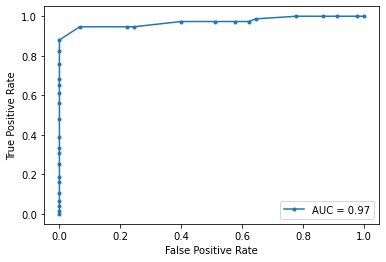

In [71]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, marker='.', label= 'AUC = %0.2f' % (auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')